<a href="https://colab.research.google.com/github/shahroz-dev/Food-Dishes-Image-Classification-with-Transfer-Learning/blob/main/07_milestone_project_1_Food_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 1: Food Vision Big

## Check GPU

* Not all google colab GPUs compatible for mixed precision training.

Google Colab offers:
* K80 (not comaptible)
* p100  (not comaptible)
* Tesla T4 (compatible)
Our GPU needs a computability score of 7+


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-84754b8a-25e5-ae3d-9f5c-1a0cc83bfba0)


**Note:** You can access the Tesla T4 if not given in a run by doing factory reset sometimes untill you got your luck to get Tesla T4 GPU

## Get helper function from github

In [ ]:
# Download helper function script

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-10-10 19:02:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-10-10 19:02:49 (103 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper function
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

## Use tensorflow datasets to download data

In [ ]:
# Get tensorflow datasets
import tensorflow_datasets as tfds

In [ ]:
# List all available datasets
datasets_list = tfds.list_builders() # get all available datasets in TFDS
print("food101" in datasets_list) # is our target in the list of TFDS dataset

True


In [ ]:
# Load in the data (takes 5-6 minutes in Google Colab)
(train_data, test_data), ds_info = tfds.load(name = "food101",
                                             split = ["train", "validation"],
                                             shuffle_files = False,
                                             as_supervised=True, # data gets returned in tuple format (data, label)
                                             with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incomplete2UW9PI/food101-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incomplete2UW9PI/food101-validation.tfrecord*...:   0%|         …

Dataset food101 downloaded and prepared to ~/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


## Exploring the Food101 data from Tensorflow Datasets

To become one with the data, we want to find:
* Class names
* The shape of our input data (image tensors)
* The datatype of our input data
* What the labels look like (e.g. are they one-hot encoded or are they label encoded)
* Do the labels match up with the class names

In [ ]:
# Features of Food101 from TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
# Take one sample of train data
train_one_sample = train_data.take(1) 

In [ ]:
# What does one sample of our training data look like?
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Output info about our training sample
for image, label in train_one_sample:
  print("""
  Image Shape: {}
  Image datatype: {}
  Target class from Food101 (tensor form): {}
  Class name (str form): {}
  """.format(image.shape, image.dtype, label, class_names[label.numpy()]))


  Image Shape: (512, 512, 3)
  Image datatype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 56
  Class name (str form): huevos_rancheros
  


**Note:** It shows our label are not one hot encoded

In [ ]:
# What does our image tensor from TFDS look like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]],

       [[228, 254, 253],
        [226, 255, 253],
        [223, 255, 252],
        ...,
        [164, 159, 155],
        [145, 141, 138],
        [128, 127, 125]],

       ...,

       [[ 66, 112, 164],
        [ 67, 113, 163],
        [ 55,  99, 148],
        ...,
        [  5,  14,  23],
        [  9,  18,  27],
        [  8,  17,  26]],

       [[ 76, 123, 177],
        [ 75, 122, 176],
        [ 70, 116, 168],
        ...,
        [  5,  14,  23],
        [  9,  18,  25],
        [  7,  16,  23]],

       [[ 80, 129, 185],
        [ 71, 121, 174],
        [ 74, 121, 175],
        ...,
        [  7,  16,  2

In [ ]:
# What are the min and max values of our image tensors?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

### Plot an Image from tensorflow datasets

(-0.5, 511.5, 511.5, -0.5)

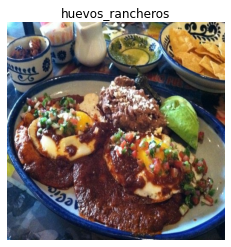

In [ ]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)

## Create preprocessing functions for our data

Neural network perform best when data is in a certain way (e.g. batched, normalized, etc).

However, not all data (including data from Tensorflow Datadsets) comes like this.

So in order to get it ready for a neural network, you'll often have to write preprocessing fucntions and map it to your data.

What we know about our data:
* In `uint8` datatype
* Comprised of all different size tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

What we know models like:
* Data in `float32` dtype (or for mixed precision `float16` and `float32`)
* For batches, Tensorflow likes all of the tensors within a batch to be of the same size
* Scaled (values between 0 and 1) also called normalized tensors generally perform better

With these points in mind, we've got a few things we can tackle with a preprocessing function

Since we're going to be using an EfficientNetBX pretrained model from tf.keras.applications we don't need to rescale our data (these architecture have rescaling built-in)

This means our functions needs to:
1. Reshape our images to all the same size
2. Convert the dtype of our image tensors from `uint8` to `float32`.





In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224): # Usually image shapes should be in multiple of 8 is best this is how GPUs compute numbers
  """
  Converts image datatype from `uint8` -> `float32' and reshapes
  image to [image_shape, image_shape, color_channels]
  """
  image = tf.image.resize(image, [img_shape, img_shape]) # reshape target image
  # image = image / 255. # notv required for EfficientNetBX model
  return tf.cast(image, tf.float32), label # return tuple of float 32 image and labels

In [ ]:
# Preprocess a single sample image and check the outputs
preprocessed_image = preprocess_img(image, label)[0]
print("Image before preprocessing:\n {}..., \nShape: {}, \nDatatype: {}\n".format(image[:2], image.shape, image.dtype))
print("Image after preprocessing:\n {}..., \nShape: {}, \nDatatype: {}\n".format(preprocessed_image[:2], preprocessed_image.shape, preprocessed_image.dtype))

Image before preprocessing:
 [[[233 253 251]
  [231 253 250]
  [228 254 251]
  ...
  [ 85  82  89]
  [ 68  67  75]
  [ 57  57  67]]

 [[232 254 252]
  [229 254 251]
  [226 255 251]
  ...
  [121 116 120]
  [100  99 104]
  [ 86  85  91]]]..., 
Shape: (512, 512, 3), 
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[230.65816  253.64285  251.      ]
  [222.99998  254.97449  252.19388 ]
  [207.06633  255.       250.36734 ]
  ...
  [140.66287  129.52519  121.22428 ]
  [121.14268  115.265144 116.95397 ]
  [ 83.95363   83.08119   89.63737 ]]

 [[221.47449  254.37755  253.33163 ]
  [214.5102   255.       253.92348 ]
  [198.41327  254.58673  251.96939 ]
  ...
  [208.66318  195.82143  173.40823 ]
  [197.03056  190.1071   174.83162 ]
  [175.54036  171.6169   161.21384 ]]]..., 
Shape: (224, 224, 3), 
Datatype: <dtype: 'float32'>



## Batch & Prepare Datasets

In [ ]:
# Map preprocessing function to training (and parallelize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls = tf.data.AUTOTUNE) # AUTOTUNE means utilize all preprocessing power that GPU finds
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE) # shuffle 1000 samples at a time

# Map preprocessing function to test data
test_data = test_data.map(map_func=preprocess_img, num_parallel_calls = tf.data.AUTOTUNE).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

## Prefetch prepares the next batch in CPU for fatser load it for computation to GPU 

In [ ]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create modelling callbacks

We're going to create a couple of callbacks to help us while our model trains:
* Tensorboard callback to log training results (so we can visualize them later if need be)
* ModelCheckpoint callback to save our model progress after feature extraction

In [ ]:
# Create tensorboard callback (import from helper_functions.py)
from helper_functions import create_tensorboard_callback

# Create a model checkpoint callback to save a model's progress during training
checkpoint_path = "model_checkpoint/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = "val_acc",
                                                      save_best_only = True,
                                                      save_weight_only = True,
                                                      verbose = 0)

## Setup mixed precesion training

Mixed precision utilizes the combination of float32 and float16 to speed up the process

In [ ]:
# Turn on mixed precison training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16") # set global data policy to mixed precision

In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Build feature extraction model


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create functional model
inputs = layers.Input(shape = input_shape, name="input_layer")
# EfficientNet has builtin rescaling
# x = preprocessing.Rescaling(1./255)(x)
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(len(class_names))(x)
outputs = layers.Activation("softmax", dtype = tf.float32, name = "softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"]) # we use sparse categorical cross entropy because our labels are integers not one hot encoded

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

## Check layer dtype are we using mixed preprocessing


In [ ]:
# check the dtypr attribute of the layer
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


**Note:** Mixed float16 is used for computation in GPU while output variable is hardcode to float32 for numeric stability. MIxed precision can turn the layer to float16 that can use

In [ ]:
# Check the dtype policy attribute of base_model
for layer in model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False flo

## Fit the feature extraction model

1. Built a feature extraction model (train a couple output layers with base layers frozen)
2. Fine-tune some of the frozen layers fro fine tuning

In [ ]:
# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extraction = model.fit(train_data,
                                                        epochs = 3,
                                                        steps_per_epoch=len(train_data),
                                                        validation_data = test_data,
                                                        validation_steps = int(0.15 * len(test_data)),
                                                        callbacks = [create_tensorboard_callback(dir_name = "training_logs",
                                                                                                  experiment_name = "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                     model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20221010-191324
Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.8217 - accuracy: 0.5571

2368/2368 [==============================] - 181s 70ms/step - loss: 1.8217 - accuracy: 0.5571 - val_loss: 1.2320 - val_accuracy: 0.6758
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.2957 - accuracy: 0.6659

2368/2368 [==============================] - 167s 70ms/step - loss: 1.2957 - accuracy: 0.6659 - val_loss: 1.1282 - val_accuracy: 0.6994
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.1460 - accuracy: 0.7009

2368/2368 [==============================] - 168s 70ms/step - loss: 1.1460 - accuracy: 0.7009 - val_loss: 1.0868 - val_accuracy: 0.7076


In [ ]:
# Evaluate model on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 50s 63ms/step - loss: 1.0908 - accuracy: 0.7060


[1.090753197669983, 0.7060198187828064]

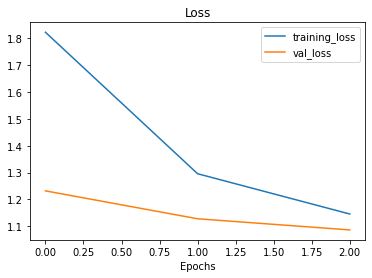

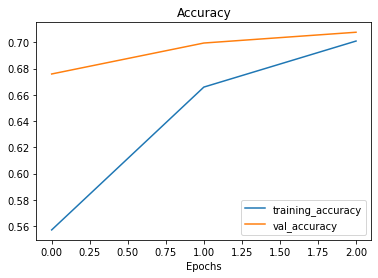

In [ ]:
# Plot the loss curves
plot_loss_curves(history_101_food_classes_feature_extraction)

## Save the whole model to file


In [ ]:
# Save model locally
model.save("101_food_classes_all_data_saved_model")

In [ ]:
# Load model
loaded_model = tf.keras.models.load_model("/content/101_food_classes_all_data_saved_model")

In [ ]:
# Check the layers in the base model and see what dtype policy they are using
for layer in loaded_model.layers[1].layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 True float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <Policy "mixed_float16">
block2a_expand_bn False floa

In [ ]:
# Check loaded model performance
loaded_model_results = loaded_model.evaluate(test_data)
loaded_model_results

790/790 [==============================] - 49s 60ms/step - loss: 1.0908 - accuracy: 0.7060


[1.090753197669983, 0.7060198187828064]

In [ ]:
# Check to see if the loaded model results equal to the original saved model
import numpy as np
np.isclose(np.array(results_feature_extract_model), np.array(loaded_model_results))

array([ True,  True])

In [ ]:
# # Download the saved model from Google Storage
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip 

In [ ]:
# # Unzip the SavedModel downloaded from Google Stroage
# !mkdir downloaded_gs_model # create new dir to store downloaded feature extraction model
# !unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model

In [ ]:
# # Load model
# gs_loaded_model = tf.keras.models.load_model("/content/downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision")

In [ ]:
# # Check loaded model performance
# gs_loaded_model_results = gs_loaded_model.evaluate(test_data)
# gs_loaded_model_results

## Preparing our model layers for fine tuning

In [ ]:
# Check to see our 2nd layers efficentnetb0 base model is trainable?
for i, layer in enumerate(loaded_model.layers[1].layers):
  print(i, layer.name, layer.trainable)

0 input_1 True
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape Fa

In [ ]:
# How many trainable variables are in our base model
print(len(loaded_model.layers[1].trainable_variables))

0


In [ ]:
# Set the last 10 layers of our base model to True
loaded_model.layers[1].trainable = True

for layer in loaded_model.layers[1].layers[:-10]:
  layer.trainable = False

# Recompile the model again
loaded_model.compile(loss = "sparse_categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(lr = 0.0001),
                     metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# check to see what layers are Trainable and their dtype policy
for i, layer in enumerate(loaded_model.layers[1].layers):
  print(i, layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

0 input_1 False float32 <Policy "float32">
1 rescaling False float32 <Policy "mixed_float16">
2 normalization False float32 <Policy "mixed_float16">
3 stem_conv_pad False float32 <Policy "mixed_float16">
4 stem_conv False float32 <Policy "mixed_float16">
5 stem_bn False float32 <Policy "mixed_float16">
6 stem_activation False float32 <Policy "mixed_float16">
7 block1a_dwconv False float32 <Policy "mixed_float16">
8 block1a_bn False float32 <Policy "mixed_float16">
9 block1a_activation False float32 <Policy "mixed_float16">
10 block1a_se_squeeze False float32 <Policy "mixed_float16">
11 block1a_se_reshape False float32 <Policy "mixed_float16">
12 block1a_se_reduce False float32 <Policy "mixed_float16">
13 block1a_se_expand False float32 <Policy "mixed_float16">
14 block1a_se_excite False float32 <Policy "mixed_float16">
15 block1a_project_conv False float32 <Policy "mixed_float16">
16 block1a_project_bn False float32 <Policy "mixed_float16">
17 block2a_expand_conv False float32 <Policy 

In [ ]:
# Create earlt stopping callback
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down 
                                                 min_lr=1e-7)

# Fit the feature extraction model with callbacks
history_101_food_classes_feature_extraction_fine_tune = loaded_model.fit(train_data,
                                                                         epochs = 100,
                                                                         steps_per_epoch=len(train_data),
                                                                         validation_data = test_data,
                                                                         validation_steps = int(0.15 * len(test_data)),
                                                                         initial_epoch = history_101_food_classes_feature_extraction.epoch[-1],
                                                                         callbacks = [create_tensorboard_callback(dir_name = "training_logs",
                                                                                                                  experiment_name = "efficientnetb0_101_classes_all_data_feature_extract_fine_tune"),
                                                                                      model_checkpoint,
                                                                                      earlystop_callback,
                                                                                      reduce_lr])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract_fine_tune/20221010-192458
Epoch 3/100
2368/2368 [==============================] - ETA: 0s - loss: 0.9503 - accuracy: 0.7488

2368/2368 [==============================] - 184s 74ms/step - loss: 0.9503 - accuracy: 0.7488 - val_loss: 1.0024 - val_accuracy: 0.7278 - lr: 1.0000e-04
Epoch 4/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.8026 - accuracy: 0.7884

2368/2368 [==============================] - 174s 73ms/step - loss: 0.8026 - accuracy: 0.7884 - val_loss: 0.9847 - val_accuracy: 0.7270 - lr: 1.0000e-04
Epoch 5/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.6930 - accuracy: 0.8174

2368/2368 [==============================] - 173s 72ms/step - loss: 0.6930 - accuracy: 0.8174 - val_loss: 0.9782 - val_accuracy: 0.7323 - lr: 1.0000e-04
Epoch 6/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.5975 - accuracy: 0.8433

2368/2368 [==============================] - 173s 72ms/step - loss: 0.5975 - accuracy: 0.8433 - val_loss: 0.9863 - val_accuracy: 0.7344 - lr: 1.0000e-04
Epoch 7/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.5134 - accuracy: 0.8685


Epoch 7: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 179s 75ms/step - loss: 0.5134 - accuracy: 0.8685 - val_loss: 0.9956 - val_accuracy: 0.7349 - lr: 1.0000e-04
Epoch 8/100
2367/2368 [============================>.] - ETA: 0s - loss: 0.3883 - accuracy: 0.9076

2368/2368 [==============================] - 176s 74ms/step - loss: 0.3883 - accuracy: 0.9076 - val_loss: 1.0009 - val_accuracy: 0.7421 - lr: 2.0000e-05


In [ ]:
fine_tuned_model_results = loaded_model.evaluate(test_data)
fine_tuned_model_results

790/790 [==============================] - 51s 65ms/step - loss: 1.0047 - accuracy: 0.7388


[1.0047109127044678, 0.7388119101524353]

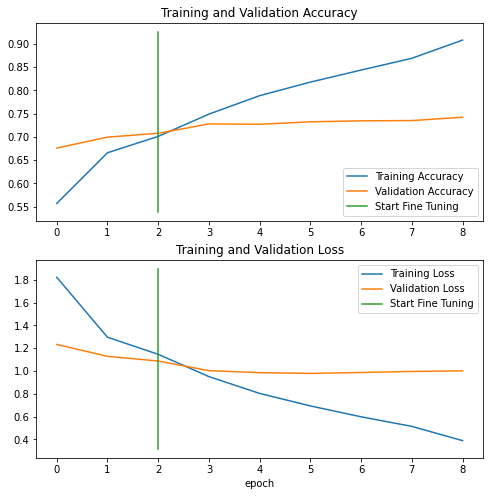

In [ ]:
from helper_functions import compare_historys
compare_historys(history_101_food_classes_feature_extraction, history_101_food_classes_feature_extraction_fine_tune, 3)

In [ ]:
# View tensorboard logs of transfer learning modelling experiments (shouls -4 models)
# Upload Tensorboard dev records
!tensorboard dev upload --logdir ./training_logs \
  --name "Food Vision 101 with Transfer Learning and Fine Tuning" \
  --description "Food Vision 101 with transfer learning experiments and with varying amount of data and fine fine tuning." \
  --one_shot # exits the uploader once its finished uploading


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./training_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=XZigGVdlYC6IxUyrI8mwa6Vn4le5p4&prompt=consent&access_type=offli

In [ ]:
!tensorboard dev list

https://tensorboard.dev/experiment/oN8pLvmIQlKhnLpjHACRDA/
	Name                 Food Vision 101 with Transfer Learning and Fine Tuning
	Description          Food Vision 101 with transfer learning experiments and with varying amount of data and fine fine tuning.
	Id                   oN8pLvmIQlKhnLpjHACRDA
	Created              2022-10-10 19:45:24 (10 seconds ago)
	Updated              2022-10-10 19:45:28 (6 seconds ago)
	Runs                 4
	Tags                 5
	Scalars              54
	Tensor bytes         0
	Binary object bytes  1678073
https://tensorboard.dev/experiment/gQh1QnBzQXGR3LXz9gbWiQ/
	Name                 Transfer Learning Experiments with 10 Food101 Classes
	Description          A series of different transfer learning experiments with varying amount of data and fine fine tuning.
	Id                   gQh1QnBzQXGR3LXz9gbWiQ
	Created              2022-09-06 14:04:03
	Updated              2022-09-06 14:04:12
	Runs                 10
	Tags                 5
	Scalars   

In [ ]:
# To delete an experiment you need an id
# !tensorboard dev delete --experiment_id  s1T9HLyLSZOcq4S4QsB2dg

No such experiment s1T9HLyLSZOcq4S4QsB2dg. Either it never existed or it has already been deleted.



In [ ]:
# Save the final version of model
loaded_model.save("/content/drive/MyDrive/Tensorflow saved models/101_food_classes_all_data_final_saved_model")

In [ ]:
# Load model
final_loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Tensorflow saved models/101_food_classes_all_data_final_saved_model")

In [ ]:
# Evaluate the mode
final_loaded_model_results = final_loaded_model.evaluate(test_data)

790/790 [==============================] - 54s 66ms/step - loss: 1.0047 - accuracy: 0.7388


In [ ]:
final_loaded_model_results

[1.0047109127044678, 0.7388119101524353]

In [ ]:
# Check is loaded model same as saved model
np.isclose(np.array(final_loaded_model_results), np.array(fine_tuned_model_results))

array([ True,  True])

## Make prediction with our trained model

In [ ]:
preds_prob = final_loaded_model.predict(test_data, verbose = 1)

790/790 [==============================] - 50s 62ms/step


In [ ]:
len(preds_prob), preds_prob.shape

(25250, (25250, 101))

In [ ]:
len(test_data)

790

In [ ]:
preds_prob[0]

array([1.32319750e-03, 1.69800487e-07, 1.52208173e-07, 7.14886767e-07,
       2.76774736e-05, 2.43227987e-07, 2.53831178e-09, 1.75559251e-06,
       1.92177109e-02, 1.17440446e-04, 2.13874937e-05, 4.05621048e-09,
       2.50571378e-04, 1.42771270e-04, 7.59848393e-04, 1.25466534e-06,
       3.22417170e-03, 5.37842046e-03, 1.91601801e-09, 1.10723829e-06,
       5.40437695e-10, 1.29254558e-03, 4.58247168e-03, 2.67695873e-06,
       6.75419685e-08, 6.54639223e-08, 1.03423154e-05, 3.88092565e-04,
       1.88347576e-06, 7.49866247e-01, 5.94264008e-02, 5.25226205e-05,
       4.47364727e-07, 3.62070721e-11, 2.54517305e-04, 1.21096075e-08,
       2.42862108e-04, 4.61565605e-07, 2.95069018e-08, 1.34323244e-07,
       5.20827692e-09, 4.83716576e-07, 1.48146846e-05, 2.85990680e-08,
       4.81686913e-09, 1.09301887e-01, 1.41575658e-08, 2.60397481e-08,
       1.89426132e-07, 6.27293184e-06, 8.40573406e-08, 8.58699778e-09,
       9.17932709e-07, 9.34350373e-06, 1.54838004e-10, 3.59467663e-07,
      

In [ ]:
preds_classes = preds_prob.argmax(axis = 1)
preds_classes[:10]

array([29, 81, 91, 53, 97, 97, 10, 31,  3,  8])

In [ ]:
len(preds_classes)

25250

In [ ]:
y_labels = []
for images, label in test_data.unbatch():
  y_labels.append(label.numpy())
y_labels[:10]

[29, 81, 91, 53, 97, 97, 10, 31, 3, 100]

In [ ]:
len(y_labels)

25250

## Evaluating our model's predictions

In [ ]:
# Use scikit learn to get accuarcy score
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true = y_labels, 
                                  y_pred = preds_classes)
sklearn_accuracy

0.7388118811881188

In [ ]:
# Does this metric come close to our model's evaluate results
import numpy as np
np.isclose(final_loaded_model_results[1], sklearn_accuracy)

True

## Make a confusion matrix for visual evaluation

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# We need to change the confusion matrix function from helper function to make x labels in vertical
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Changed( plot x-labels vertically) ###
  plt.xticks(rotation=70, fontsize = text_size)
  plt.yticks(fontsize = text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
class_names = ds_info.features['label'].names

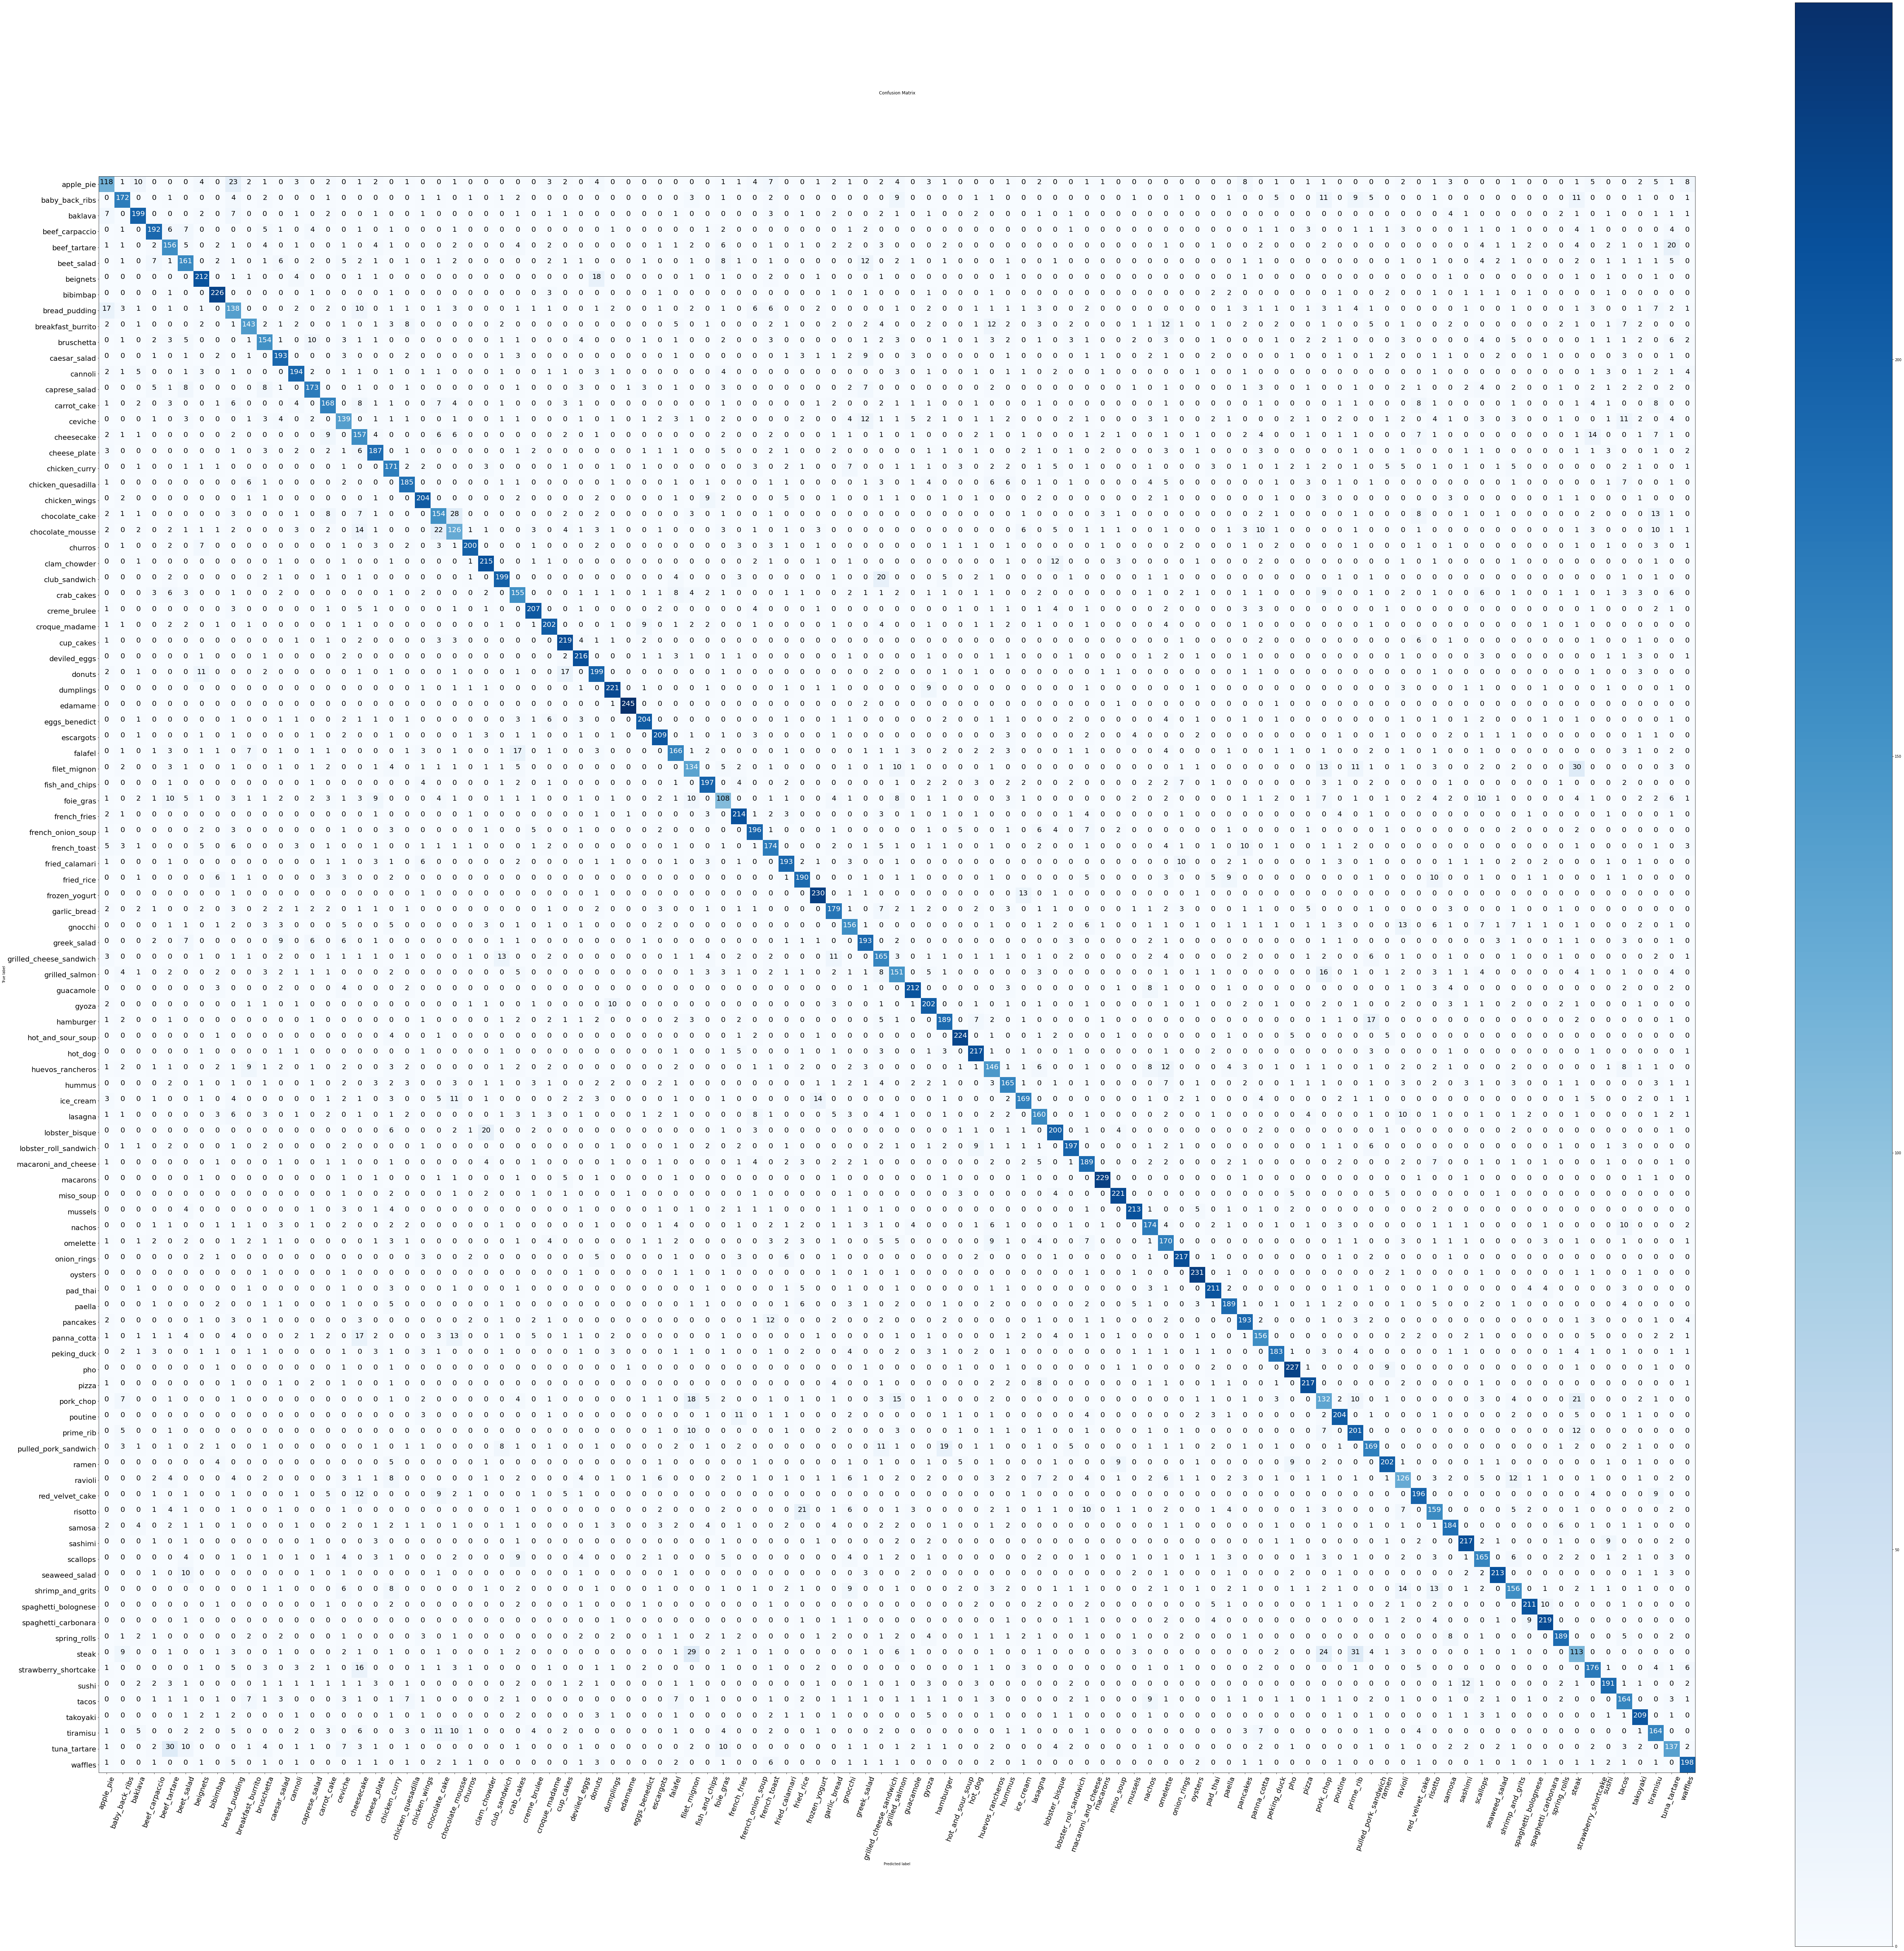

In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=preds_classes,
                      classes=class_names,
                      figsize = (100, 100),
                      text_size  = 20,
                      savefig = True)

## Genrate classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true = y_labels,
                            y_pred = preds_classes))

              precision    recall  f1-score   support

           0       0.60      0.47      0.53       250
           1       0.74      0.69      0.72       250
           2       0.79      0.80      0.79       250
           3       0.80      0.77      0.78       250
           4       0.59      0.62      0.61       250
           5       0.63      0.64      0.64       250
           6       0.77      0.85      0.81       250
           7       0.83      0.90      0.87       250
           8       0.51      0.55      0.53       250
           9       0.74      0.57      0.65       250
          10       0.68      0.62      0.65       250
          11       0.76      0.77      0.76       250
          12       0.80      0.78      0.79       250
          13       0.78      0.69      0.73       250
          14       0.72      0.67      0.70       250
          15       0.58      0.56      0.57       250
          16       0.54      0.63      0.58       250
          17       0.73    

In [ ]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, preds_classes, output_dict=True)

In [ ]:
classification_report_dict

{'0': {'precision': 0.5959595959595959,
  'recall': 0.472,
  'f1-score': 0.5267857142857142,
  'support': 250},
 '1': {'precision': 0.7445887445887446,
  'recall': 0.688,
  'f1-score': 0.7151767151767152,
  'support': 250},
 '2': {'precision': 0.7865612648221344,
  'recall': 0.796,
  'f1-score': 0.7912524850894632,
  'support': 250},
 '3': {'precision': 0.7966804979253111,
  'recall': 0.768,
  'f1-score': 0.7820773930753564,
  'support': 250},
 '4': {'precision': 0.5909090909090909,
  'recall': 0.624,
  'f1-score': 0.6070038910505836,
  'support': 250},
 '5': {'precision': 0.62890625,
  'recall': 0.644,
  'f1-score': 0.6363636363636362,
  'support': 250},
 '6': {'precision': 0.7709090909090909,
  'recall': 0.848,
  'f1-score': 0.8076190476190476,
  'support': 250},
 '7': {'precision': 0.8339483394833949,
  'recall': 0.904,
  'f1-score': 0.8675623800383877,
  'support': 250},
 '8': {'precision': 0.5111111111111111,
  'recall': 0.552,
  'f1-score': 0.5307692307692308,
  'support': 250},


In [ ]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report dictionary items
for k, v in classification_report_dict.items():
  if k == "accuracy": #Stop once we get to accuracy key
    break
  else:
    # Add class names and f1-score to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.5267857142857142,
 'baby_back_ribs': 0.7151767151767152,
 'baklava': 0.7912524850894632,
 'beef_carpaccio': 0.7820773930753564,
 'beef_tartare': 0.6070038910505836,
 'beet_salad': 0.6363636363636362,
 'beignets': 0.8076190476190476,
 'bibimbap': 0.8675623800383877,
 'bread_pudding': 0.5307692307692308,
 'breakfast_burrito': 0.6470588235294118,
 'bruschetta': 0.6457023060796646,
 'caesar_salad': 0.7643564356435643,
 'cannoli': 0.790224032586558,
 'caprese_salad': 0.7315010570824525,
 'carrot_cake': 0.6970954356846474,
 'ceviche': 0.5661914460285132,
 'cheesecake': 0.5814814814814815,
 'cheese_plate': 0.7405940594059407,
 'chicken_curry': 0.6526717557251909,
 'chicken_quesadilla': 0.7613168724279835,
 'chicken_wings': 0.816,
 'chocolate_cake': 0.6272912423625253,
 'chocolate_mousse': 0.5174537987679672,
 'churros': 0.8528784648187633,
 'clam_chowder': 0.8382066276803117,
 'club_sandwich': 0.7975951903807615,
 'crab_cakes': 0.6163021868787276,
 'creme_brulee': 0.8346774193

In [ ]:
# Turn f1-score into dataframes for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_names": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending = False)

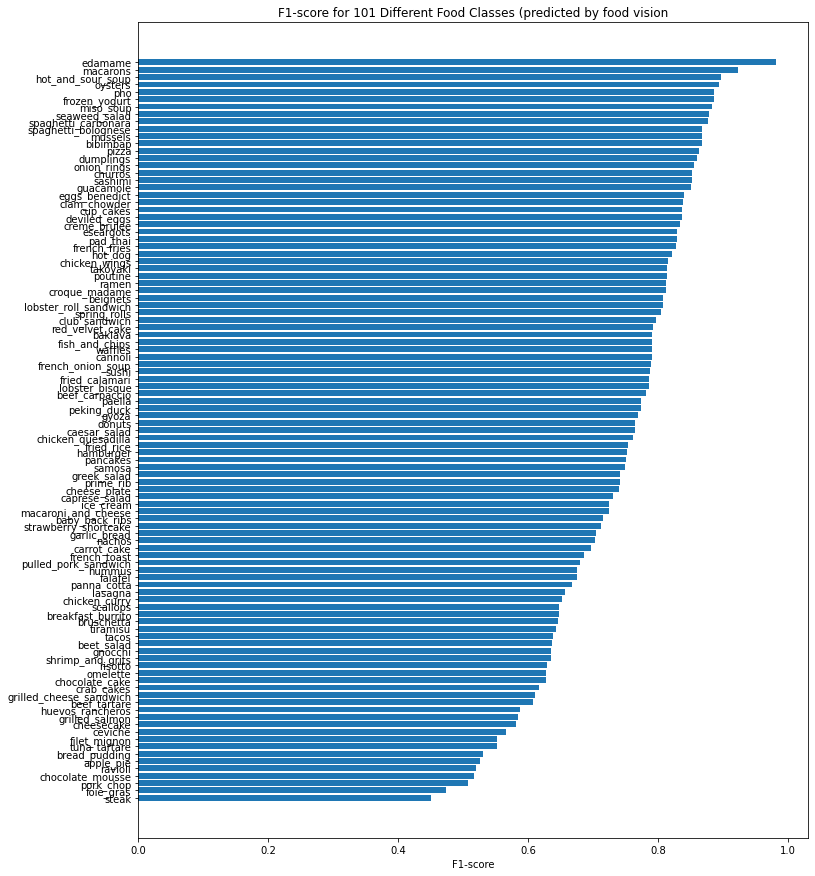

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 15))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(f1_scores["class_names"])
ax.set_xlabel("F1-score")
ax.set_title("F1-score for 101 Different Food Classes (predicted by food vision")
ax.invert_yaxis();